<a href="https://colab.research.google.com/github/mohamedgamal1455/mohamedgamal1455/blob/Data-analysis/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# تحميل البيانات إلى DataFrame
data = pd.read_csv('morley.csv')

# عرض DataFrame
print(data.head())

   Unnamed: 0  Expt  Run  Speed
0           1     1    1    850
1           2     1    2    740
2           3     1    3    900
3           4     1    4   1070
4           5     1    5    930


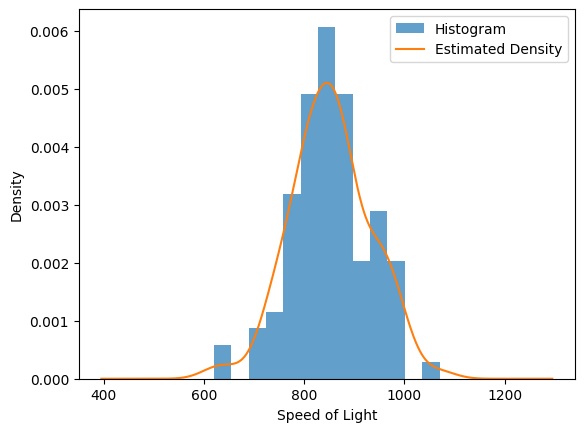

In [9]:
import matplotlib.pyplot as plt

# Plot histogram of relative frequencies
plt.hist(data['Speed'], bins='auto', density=True, alpha=0.7, label='Histogram')

# Plot estimated density
data['Speed'].plot(kind='density', label='Estimated Density')

# Add labels and legend
plt.xlabel('Speed of Light')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

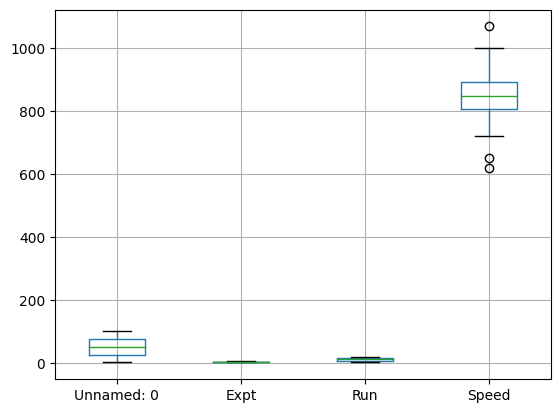

In [10]:
# Boxplot of the data
data.boxplot()

# Show the plot
plt.show()

In [14]:
# Numerical summaries for each experiment
experiment_summaries = data.groupby('Expt')['Speed'].describe()
print(experiment_summaries)

      count   mean         std    min    25%    50%    75%     max
Expt                                                              
1      20.0  909.0  104.926039  650.0  850.0  940.0  980.0  1070.0
2      20.0  856.0   61.164145  760.0  800.0  845.0  885.0   960.0
3      20.0  845.0   79.106856  620.0  840.0  855.0  880.0   970.0
4      20.0  820.5   60.041652  720.0  767.5  815.0  865.0   920.0
5      20.0  831.5   54.219340  740.0  807.5  810.0  870.0   950.0


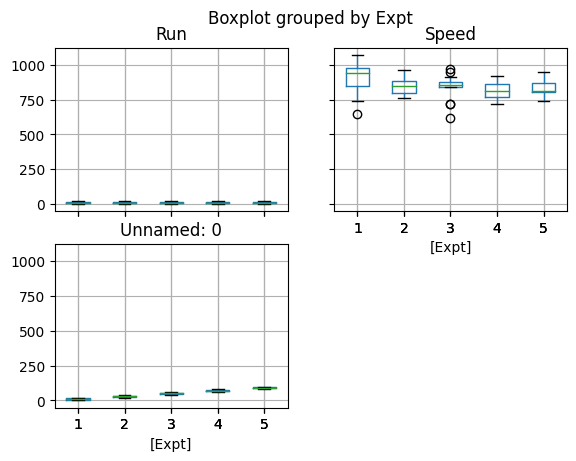

In [15]:
# Boxplot of the data for each experiment
data.boxplot(by='Expt')

# Show the plot
plt.show()

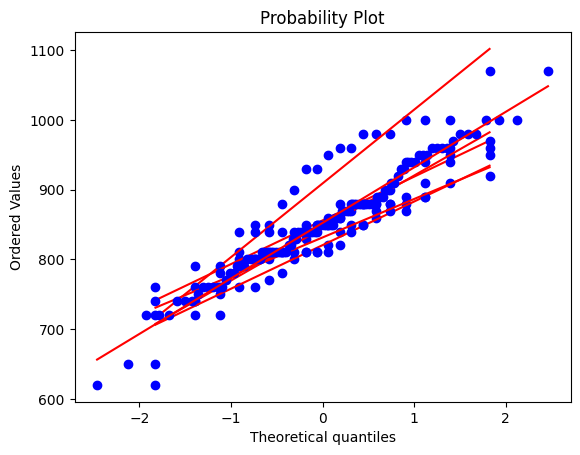

In [16]:
import scipy.stats as stats

# Quantile plot for each experiment
for experiment in data['Expt'].unique():
    experiment_data = data[data['Expt'] == experiment]['Speed']
    stats.probplot(experiment_data, dist='norm', plot=plt)

# Quantile plot for the whole dataset
stats.probplot(data['Speed'], dist='norm', plot=plt)

# Show the plots
plt.show()

In [17]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(123)

# Draw a sample from an exponential distribution
sample = np.random.exponential(scale=1/2, size=20)

# Compute the values of S and T
S = 1 / np.mean(sample)
T = 20 * np.min(sample)

# Print the values of S and T
print("S:", S)
print("T:", T)

S: 2.3820956189556317
T: 0.6153279923239695


In [18]:
# Set the seed for reproducibility
np.random.seed(123)

# Initialize arrays to store the values of S and T
S_values = []
T_values = []

# Repeat the procedure 1000 times
for _ in range(1000):
    # Draw a sample from an exponential distribution
    sample = np.random.exponential(scale=1/2, size=20)

    # Compute the values of S and T
    S = 1 / np.mean(sample)
    T = 20 * np.min(sample)

    # Append the values to the arrays
    S_values.append(S)
    T_values.append(T)

# Convert the arrays to numpy arrays
S_values = np.array(S_values)
T_values = np.array(T_values)

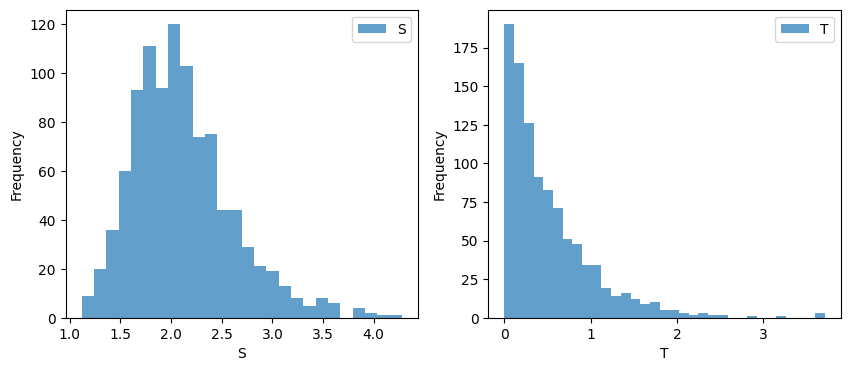

In [19]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram for S
ax1.hist(S_values, bins='auto', alpha=0.7, label='S')

# Plot histogram for T
ax2.hist(T_values, bins='auto', alpha=0.7, label='T')

# Add labels and legends
ax1.set_xlabel('S')
ax1.set_ylabel('Frequency')
ax1.legend()

ax2.set_xlabel('T')
ax2.set_ylabel('Frequency')
ax2.legend()

# Show the plot
plt.show()

In [20]:
# Calculate empirical variances
var_S = np.var(S_values)
var_T = np.var(T_values)

# Print the empirical variances
print("Empirical variance for S:", var_S)
print("Empirical variance for T:", var_T)

Empirical variance for S: 0.24440162515830588
Empirical variance for T: 0.2627910067436105


In [21]:
# Calculate empirical variances based on the original sample
var_S_original = np.var(1 / np.mean(sample))
var_T_original = np.var(20 * np.min(sample))

# Print the empirical variances based on the original sample
print("Empirical variance for S (based on original sample):", var_S_original)
print("Empirical variance for T (based on original sample):", var_T_original)

Empirical variance for S (based on original sample): 0.0
Empirical variance for T (based on original sample): 0.0
